In [1]:
!pip uninstall cupy-cuda11x -y && pip uninstall cupy -y

Found existing installation: cupy-cuda11x 11.0.0
Uninstalling cupy-cuda11x-11.0.0:
  Successfully uninstalled cupy-cuda11x-11.0.0


In [2]:
!pip freeze | grep cupy

In [3]:
!sudo add-apt-repository "deb https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/ /"
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!sudo apt update
!sudo apt-get install libcusparselt0=0.2.0.1-1 libcusparselt-dev=0.2.0.1-1

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [3,145 kB]
Hit:14 http://ppa.la

In [4]:
!ldconfig -v

/sbin/ldconfig.real: Path `/usr/local/cuda-11/targets/x86_64-linux/lib' given more than once
/sbin/ldconfig.real: Can't stat /usr/local/cuda-11.2.2/extras/CUPTI/lib64: No such file or directory
/sbin/ldconfig.real: Path `/usr/local/lib' given more than once
/sbin/ldconfig.real: Can't stat /usr/local/nvidia/lib: No such file or directory
/sbin/ldconfig.real: Can't stat /usr/local/nvidia/lib64: No such file or directory
/sbin/ldconfig.real: Can't stat /usr/local/lib/x86_64-linux-gnu: No such file or directory
/sbin/ldconfig.real: Path `/lib/x86_64-linux-gnu' given more than once
/sbin/ldconfig.real: Path `/usr/lib/x86_64-linux-gnu' given more than once
/usr/local/cuda/targets/x86_64-linux/lib:
	libcurand.so.10 -> libcurand.so.10.2.3.152
	libnppc.so.11 -> libnppc.so.11.3.2.152
	libnppidei.so.11 -> libnppidei.so.11.3.2.152
	libnppisu.so.11 -> libnppisu.so.11.3.2.152
	libnppicc.so.11 -> libnppicc.so.11.3.2.152
	libnppitc.so.11 -> libnppitc.so.11.3.2.152
	libcublas.so.11 -> libcublas.so.11.4

In [5]:
!python -m pip install -U setuptools pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 66.0.0 which is incompatible.


In [6]:
!apt-get install g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
W: Target Packages (Packages) is configured multiple times in /etc/apt/sources.list:53 and /etc/apt/sources.list.d/cuda-ubuntu1804-x86_64.list:1


In [7]:
# # To get the wheel file manually.
# !python -m pip wheel --wheel-dir=/tmp/wheelhouse cupy -vvvv

### *-> if you are manually generating the wheel in the cell above, skip the rest of the installation*

In [8]:
# pull repo
!git clone https://github.com/char-tan/sparsity

# change working directory
import os
os.chdir('sparsity/ops')

Cloning into 'sparsity'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 263 (delta 37), reused 68 (delta 26), pack-reused 183
Receiving objects: 100% (263/263), 356.74 MiB | 44.29 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [9]:
!git checkout sd_dev

Branch 'sd_dev' set up to track remote branch 'sd_dev' from 'origin'.
Switched to a new branch 'sd_dev'


In [10]:
!cp /content/sparsity/dependencies/* /content/

In [11]:
%%file requirements.txt

Cython>=0.29.22,<3
numpy>=1.20,<1.26
fastrlock>=0.5

Writing requirements.txt


In [12]:
!python -m pip install --no-cache-dir /content/cupy-11.4.0-cp38-cp38-linux_x86_64.whl -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/cupy-11.4.0-cp38-cp38-linux_x86_64.whl


In [13]:
!pip freeze | grep cupy

cupy @ file:///content/cupy-11.4.0-cp38-cp38-linux_x86_64.whl


In [14]:
import cupy
cupy.show_config()

OS                           : Linux-5.10.147+-x86_64-with-glibc2.27
Python Version               : 3.8.16
CuPy Version                 : 11.4.0
CuPy Platform                : NVIDIA CUDA
NumPy Version                : 1.21.6
SciPy Version                : 1.7.3
Cython Build Version         : 0.29.32
Cython Runtime Version       : 0.29.32
CUDA Root                    : /usr/local/cuda
nvcc PATH                    : /usr/local/cuda/bin/nvcc
CUDA Build Version           : 11020
CUDA Driver Version          : 11020
CUDA Runtime Version         : 11020
cuBLAS Version               : (available)
cuFFT Version                : 10401
cuRAND Version               : 10203
cuSOLVER Version             : (11, 1, 0)
cuSPARSE Version             : (available)
NVRTC Version                : (11, 2)
Thrust Version               : 101000
CUB Build Version            : 101000
Jitify Build Version         : <unknown>
cuDNN Build Version          : 8101
cuDNN Version                : 8101
NCCL Build Vers

In [15]:
# do we need cutensor? cudNN? I'm not sure...

#!python -m cupyx.tools.install_library --cuda 11.2 --library cutensor

In [16]:
import cupy
import numpy as np
import numpy
cupy.random.seed(0)
numpy.random.seed(0)
from cupyx.profiler import benchmark
import cupyx.time
cupy.random.random()

array(0.43845084)

In [ ]:
# %%bash

# cd /content
# # wget https://developer.download.nvidia.com/compute/cusparselt/redist/libcusparse-lt/linux-x86_64/libcusparse_lt-linux-x86_64-0.3.0.3-archive.tar.xz
# # tar -xf libcusparse_lt-linux-x86_64-0.3.0.3-archive.tar.xz
# CUSPARSELT_PATH=/content/libcusparse_lt-linux-x86_64-0.3.0.3-archive.tar.xz
# make
# make test

In [ ]:
#
# Example of matrix multiply using cuSPARSELt
#
# (*) https://docs.nvidia.com/cuda/cusparselt/getting_started.html#code-example
#
import cupy
import numpy
cupy.random.seed(0)
numpy.random.seed(0)
from cupyx.profiler import benchmark
import cupyx.time
cupy._default_memory_pool.free_all_blocks()
import json
import subprocess

from cupy.cuda import runtime
from cupy_backends.cuda.libs.cusparselt import Handle, MatDescriptor, MatmulDescriptor, MatmulAlgSelection, MatmulPlan  # NOQA
from cupy_backends.cuda.libs import cusparselt, cusparse

def sparse_mm_benchmark(A, B, C, exp_params: dict):
    # dtype = 'float16'
    # m, n, k = 1024, 1024, 1024
    # A = cupy.random.random((m, k)).astype(dtype)
    # B = cupy.ones((k, n), dtype=dtype)
    # C = cupy.zeros((m, n), dtype=dtype)

    #
    # initializes cusparselt handle and data structures
    #
    handle = Handle()
    matA = MatDescriptor()
    matB = MatDescriptor()
    matC = MatDescriptor()
    matmul = MatmulDescriptor()
    alg_sel = MatmulAlgSelection()
    plan = MatmulPlan()
    cusparselt.init(handle)

    #
    # initializes matrix descriptors
    #
    alignment = 128
    order = cusparse.CUSPARSE_ORDER_ROW
    cuda_dtype = runtime.CUDA_R_16F
    cusparselt.structuredDescriptorInit(handle, matA, A.shape[0], A.shape[1],
                                        A.shape[1], alignment, cuda_dtype, order,
                                        cusparselt.CUSPARSELT_SPARSITY_50_PERCENT)
    cusparselt.denseDescriptorInit(handle, matB, B.shape[0], B.shape[1],
                                B.shape[1], alignment, cuda_dtype, order)
    cusparselt.denseDescriptorInit(handle, matC, C.shape[0], C.shape[1],
                                C.shape[1], alignment, cuda_dtype, order)

    #
    # initializes matmul, algorithm selection and plan
    #
    opA = cusparse.CUSPARSE_OPERATION_NON_TRANSPOSE
    opB = cusparse.CUSPARSE_OPERATION_NON_TRANSPOSE
    compute_type = cusparselt.CUSPARSE_COMPUTE_16F
    cusparselt.matmulDescriptorInit(handle, matmul, opA, opB, matA, matB, matC,
                                    matC, compute_type)
    cusparselt.matmulAlgSelectionInit(handle, alg_sel, matmul,
                                    cusparselt.CUSPARSELT_MATMUL_ALG_DEFAULT)
    alg = numpy.array(0, dtype='int32')
    cusparselt.matmulAlgSetAttribute(handle, alg_sel,
                                    cusparselt.CUSPARSELT_MATMUL_ALG_CONFIG_ID,
                                    alg.ctypes.data, 4)
    workspace_size = cusparselt.matmulGetWorkspace(handle, alg_sel)
    workspace = cupy.empty(workspace_size, dtype='int8')
    cusparselt.matmulPlanInit(handle, plan, matmul, alg_sel, workspace_size)

    #
    # prunes the matrix A in-place and checks the correstness
    #
    # print('Before pruning, A[0]:\n{}'.format(A[0]))
    cusparselt.spMMAPrune(handle, matmul, A.data.ptr, A.data.ptr,
                        cusparselt.CUSPARSELT_PRUNE_SPMMA_TILE)
    # print('After pruning, A[0]:\n{}'.format(A[0]))
    is_valid = numpy.array(-1, dtype='int32')
    cusparselt.spMMAPruneCheck(handle, matmul, A.data.ptr, is_valid.ctypes.data)

    #
    # compresses the matrix A
    #
    compressed_size = cusparselt.spMMACompressedSize(handle, plan)
    A_compressed = cupy.zeros(compressed_size, dtype='uint8')
    cusparselt.spMMACompress(handle, plan, A.data.ptr, A_compressed.data.ptr)


    cupy.cuda.stream.get_current_stream().synchronize()
    #
    # matmul: C = A @ B
    #
    alpha = numpy.array(1.0, dtype='float32')
    beta = numpy.array(0.0, dtype='float32')
    # cusparselt.matmul(handle, plan, alpha.ctypes.data, A_compressed.data.ptr,
    #                 B.data.ptr, beta.ctypes.data, C.data.ptr, C.data.ptr,
    #                 workspace.data.ptr)

    # print('A.sum(axis=1): {}'.format(A.sum(axis=1)))
    # print('C[:, 0]: {}'.format(C[:, 0]))

    args=(handle, plan, alpha.ctypes.data, A_compressed.data.ptr,
                    B.data.ptr, beta.ctypes.data, C.data.ptr, C.data.ptr,
                    workspace.data.ptr)
    params = json.dumps(exp_params)
    print(benchmark(cusparselt.matmul,
                    name='cusplt.mm - ' + params,
                    args=args,
                    n_warmup=1000,
                    n_repeat=100,
                    devices=tuple([0])))
    cupy.cuda.stream.get_current_stream().synchronize()

    #
    # destroys plan and handle
    #
    if cusparselt.get_build_version() >= 100:
        # You need to call matDescriptorDestroy for cuSPARSELt v0.1.0 and later
        cusparselt.matDescriptorDestroy(matA)
        cusparselt.matDescriptorDestroy(matB)
        cusparselt.matDescriptorDestroy(matC)
    cusparselt.matmulPlanDestroy(plan)
    cusparselt.destroy(handle)

dtype = 'int8'
dims = 2048
m, n, k = dims, dims, dims
A = cupy.random.random((m, k)).astype(dtype)
B = cupy.ones((k, n), dtype=dtype)
C = cupy.zeros((m, n), dtype=dtype)
cupy.cuda.stream.get_current_stream().synchronize()
print(subprocess.check_output('nvidia-smi | grep 400W', shell=True))
sparse_mm_benchmark(A, B, C, exp_params={'dtype': dtype, 'dims': dims, 'warmup': 0, 'reps': 1})
print(subprocess.check_output('nvidia-smi | grep 400W', shell=True))
cupy.cuda.stream.get_current_stream().synchronize()


# for reps in [1, 10, 1000]:
#     for warmup in [0, 10, 1000]:
#         for dtype in ['int8', 'float16']:
#             for dims in [512, 1024, 2048]:
#                 m, n, k = dims, dims, dims
#                 A = cupy.random.random((m, k)).astype(dtype)
#                 B = cupy.ones((k, n), dtype=dtype)
#                 C = cupy.zeros((m, n), dtype=dtype)
#                 sparse_mm_benchmark(A, B, C, exp_params={'dtype': dtype, 'dims': dims, 'warmup': warmup, 'reps': reps})


b'| N/A   37C    P0    52W / 400W |    498MiB / 40536MiB |      0%      Default |\n'


CuSparseError: ignored

Cusparse w cupy, 512^2 x 512^2, 10 repeats, 10 warmup:

``

Cusparse w cupy, 1024^2 x 1024^2, 10 repeats, 10 warmup:

``

Cusparse w cupy, 2048^2 x 2048^2, 10 repeats, 10 warmup:
``


Cusparse w cupy, 1024^2 x 1024^2, 10 repeats, no warmup, on runtime creation:

`sparse_mm_sample    :    CPU:  377.724 us   +/-149.265 (min:  307.151 / max:  821.985) us     GPU-0:  391.578 us   +/-149.019 (min:  322.560 / max:  835.584) us`


Cusparse w cupy, 1024^2 x 1024^2, 10 repeats, no warmup:

`sparse_mm_sample    :    CPU:  355.518 us   +/-102.386 (min:  299.804 / max:  658.181) us     GPU-0:  370.074 us   +/-101.643 (min:  314.368 / max:  670.720) us`

(Fluke, possibly running too many runs) Cusparse w cupy, 1024^2 x 1024^2, 10 repeats, no warmup:

`CPU:  506.818 us   +/-141.233 (min:  381.103 / max:  766.017) us     GPU-0:  519.885 us   +/-141.276 (min:  395.264 / max:  778.240) us`


In [17]:
import cupy
import numpy
cupy.random.seed(0)
numpy.random.seed(0)
from cupy.cuda import runtime
from cupy_backends.cuda.libs import cusparselt, cusparse

def type_convert(nvidia_runtime_type):
    p_t = ['int8', 'float16', 'bfloat16', 'float32', 'int32']
    # WARNING: cupy doesn't seem to have runtime.CUDA_R_16BF :((
    n_t = [runtime.CUDA_C_8I, runtime.CUDA_R_16F, None, runtime.CUDA_R_32F, None]
    return p_t[n_t.index(nvidia_runtime_type)]

def compute_convert(nvidia_runtime_type):
    p_t = ['int8', 'float16', 'bfloat16', 'float32', 'int32']
    # WARNING: cupy doesn't seem to have many of the compute types :((
    n_t = [runtime.CUDA_C_8I, runtime.CUDA_R_16F, None, runtime.CUDA_R_32F, None]
    c_t = [None, cusparselt.CUSPARSE_COMPUTE_16F, None, None, cusparselt.CUSPARSE_COMPUTE_32I]
    print(n_t.index(nvidia_runtime_type))
    return c_t[n_t.index(nvidia_runtime_type)]

compute_convert(runtime.CUDA_R_16F)

1


0

In [18]:
# Example of batched matrix multiply using cuSPARSELt
#
# (*) https://docs.nvidia.com/cuda/cusparselt/getting_started.html#code-example
#
import cupy
import numpy
cupy.random.seed(0)
numpy.random.seed(0)
from cupyx.profiler import benchmark
import cupyx.time
import json
import subprocess
cupy._default_memory_pool.free_all_blocks()
mempool = cupy.get_default_memory_pool()
pinned_mempool = cupy.get_default_pinned_memory_pool()

from cupy.cuda import runtime
from cupy_backends.cuda.libs.cusparselt import Handle, MatDescriptor, MatmulDescriptor, MatmulAlgSelection, MatmulPlan  # NOQA
from cupy_backends.cuda.libs import cusparselt, cusparse

import inspect

def sparse_mm_batch_benchmark(A, B, C, exp_params: dict):

    #
    # initializes cusparselt handle and data structures
    #
    handle = Handle()
    matA = MatDescriptor()
    matB = MatDescriptor()
    matC = MatDescriptor()
    matmul = MatmulDescriptor()
    alg_sel = MatmulAlgSelection()
    plan = MatmulPlan()
    cusparselt.init(handle)
    

    #
    # initializes matrix descriptors
    #
    # alignment = exp_params['align']
    # order = cusparse.CUSPARSE_ORDER_ROW
    # cuda_dtype = exp_params['dtype']
    alignment = 128
    order = cusparse.CUSPARSE_ORDER_ROW
    cuda_dtype = runtime.CUDA_R_16F
    cusparselt.structuredDescriptorInit(handle, matA, A.shape[0], A.shape[1],
                                        A.shape[1], alignment, cuda_dtype, order,
                                        cusparselt.CUSPARSELT_SPARSITY_50_PERCENT)
    cusparselt.denseDescriptorInit(handle, matB, B.shape[0], B.shape[1],
                                B.shape[1], alignment, cuda_dtype, order)
    cusparselt.denseDescriptorInit(handle, matC, C.shape[0], C.shape[1],
                                C.shape[1], alignment, cuda_dtype, order)

    # # BATCH NUM and STRIDE SETUP HERE
    # int_size = 8 # sizeof(batches)
    # batches = exp_params['batches']
    # batches_ptr = cupy.cuda.runtime.malloc(24)
    # batch_arr = cupy.empty(1)
    # batch_arr[0] = batches
    # runtime.memset(batches_ptr, batches, int_size)
    # stride = exp_params['stride']
    # stride_ptr = cupy.cuda.runtime.malloc(24)
    # runtime.memset(stride_ptr, stride, int_size)
    # # print(batches, batches_ptr, runtime.memGetInfo(batches_ptr))

    # cusparselt.matDescSetAttribute(handle, matB, cusparselt.CUSPARSELT_MAT_NUM_BATCHES, batch_arr.data.ptr, int_size)
    # cusparselt.matDescSetAttribute(handle, matC, cusparselt.CUSPARSELT_MAT_NUM_BATCHES, batch_arr.data.ptr, int_size)
    # cusparselt.matDescSetAttribute(handle, matB, cusparselt.CUSPARSELT_MAT_BATCH_STRIDE, stride_ptr, int_size)
    # cusparselt.matDescSetAttribute(handle, matC, cusparselt.CUSPARSELT_MAT_BATCH_STRIDE, stride_ptr, int_size)

    #
    # initializes matmul, algorithm selection and plan
    #
    opA = cusparse.CUSPARSE_OPERATION_NON_TRANSPOSE
    opB = cusparse.CUSPARSE_OPERATION_NON_TRANSPOSE
    compute_type = exp_params['c_type']
    cusparselt.matmulDescriptorInit(handle, matmul, opA, opB, matA, matB, matC,
                                    matC, compute_type)
    # RELU SETUP GOES HERE
    # BIAS SETUP GOES HERE
    cusparselt.matmulAlgSelectionInit(handle, alg_sel, matmul,
                                    cusparselt.CUSPARSELT_MATMUL_ALG_DEFAULT)
    alg = numpy.array(0, dtype='int32')
    cusparselt.matmulAlgSetAttribute(handle, alg_sel,
                                    cusparselt.CUSPARSELT_MATMUL_ALG_CONFIG_ID,
                                    alg.ctypes.data, 4)
    # print('Selected alg', alg_sel)
    workspace_size = cusparselt.matmulGetWorkspace(handle, alg_sel)
    workspace = cupy.empty(workspace_size, dtype='int8') # TODO Review this if things not working
    cusparselt.matmulPlanInit(handle, plan, matmul, alg_sel, workspace_size)

    #
    # prunes the matrix A in-place and checks the correstness
    #
    # print('Before pruning, A[0]:\n{}'.format(A[0]))
    cusparselt.spMMAPrune(handle, matmul, A.data.ptr, A.data.ptr,
                        cusparselt.CUSPARSELT_PRUNE_SPMMA_TILE)
    # print('After pruning, A[0]:\n{}'.format(A[0]))
    is_valid = numpy.array(-1, dtype='int32')
    cusparselt.spMMAPruneCheck(handle, matmul, A.data.ptr, is_valid.ctypes.data)

    #
    # compresses the matrix A
    #
    compressed_size = cusparselt.spMMACompressedSize(handle, plan)
    A_compressed = cupy.zeros(compressed_size, dtype='uint8')
    cusparselt.spMMACompress(handle, plan, A.data.ptr, A_compressed.data.ptr)


    #
    # matmul: C = A @ B
    #
    alpha = numpy.array(1.0, dtype='float32')
    beta = numpy.array(0.0, dtype='float32')
    # cusparselt.matmul(handle, plan, alpha.ctypes.data, A_compressed.data.ptr,
    #                 B.data.ptr, beta.ctypes.data, C.data.ptr, C.data.ptr,
    #                 workspace.data.ptr)

    # print('A.sum(axis=1): {}'.format(A.sum(axis=1)))
    # print('C[:, 0]: {}'.format(C[:, 0]))
    args=(handle, plan, alpha.ctypes.data,
        A_compressed.data.ptr,
        B.data.ptr, beta.ctypes.data,
        C.data.ptr, C.data.ptr,
            workspace.data.ptr)
    params = json.dumps(exp_params)
    cupy.cuda.stream.get_current_stream().synchronize()
    perf_res = benchmark(cusparselt.matmul,
                    name='cult.mm || ' + params,
                    args=args,
                    n_warmup=exp_params['wup'],
                    n_repeat=exp_params['reps'],
                    devices=tuple([0]))
    cupy.cuda.stream.get_current_stream().synchronize()

    #
    # destroys plan and handle
    #
    if cusparselt.get_build_version() >= 100:
        # You need to call matDescriptorDestroy for cuSPARSELt v0.1.0 and later
        cusparselt.matDescriptorDestroy(matA)
        cusparselt.matDescriptorDestroy(matB)
        cusparselt.matDescriptorDestroy(matC)
    cusparselt.matmulPlanDestroy(plan)
    cusparselt.destroy(handle)
    return perf_res

# TESTING

# reps = 5
# warmup = 5
# rand_choices = 'rand-ones'
# dtype = runtime.CUDA_R_16F
# dims = 512
# batches = 16
# stride = dims * dims * 128
# # Note, not actually needed: 
# #   alignment = 16 ?
# #   A_size_bytes   = num_batches * batch_strideA * sizeof(__half)
# #   etc for other matrices
# m, n, k = dims, dims, dims
# A = cupy.random.random((m, k)).astype(type_convert(dtype))
# B = cupy.ones((batches, k, n), dtype=type_convert(dtype))
# C = cupy.zeros((batches, m, n), dtype=type_convert(dtype))
# # batch_strideA = m * k + 128
# # batch_strideB = k * n + 128
# # batch_strideC = m * n + 128
# cupy.cuda.stream.get_current_stream().synchronize()
# print(subprocess.check_output('nvidia-smi | grep 400W', shell=True))
# perf_res = sparse_mm_batch_benchmark(A, B, C, exp_params={'dtype': dtype, 'dims': dims, 'wup': warmup, 'reps': reps, 'rand': rand_choices, 'batches': batches, 'stride': stride})
# print(perf_res.gpu_times[0])
# print(subprocess.check_output('nvidia-smi | grep 400W', shell=True))
# cupy.cuda.stream.get_current_stream().synchronize()

# REAL EXP

all_cult_perf_res = []
reps_l = [50] # [1, 10, 100]
warmup_l = [50] # [0, 10, 100]
dtype_l = [runtime.CUDA_R_16F] # [runtime.CUDA_C_8I, runtime.CUDA_R_16F, runtime.CUDA_R_32F]
dims_l = [32, 64, 128, 256, 512, 1280, 2560, 3840, 5120, 6400, 7680, 8960, 10240, 11520, 12800, ]
rand_choices_l = ['rand-ones'] # ['rand-ones', 'rand-rand']
alignment = 128
# batches_l = [16, 32, 64, 128, 256]
# strides_l = [dims * dims * 128]
for reps in reps_l:
    print(subprocess.check_output('nvidia-smi | grep 400W', shell=True))
    for warmup in warmup_l:
        for dtype in dtype_l:
            compute_type = compute_convert(dtype)
            for dims in dims_l:
                for rand_choices in rand_choices_l:
                    # for batches in batches_l:
                    #     for stride in strides_l:
                    m, n, k = dims, dims, dims
                    if rand_choices == 'rand-ones':
                        # Rand x ones
                        A = cupy.random.random((m, k)).astype(type_convert(dtype))
                        B = cupy.ones((k, n), dtype=type_convert(dtype))
                        C = cupy.zeros((m, n), dtype=type_convert(dtype))
                    elif rand_choices == 'rand-rand':
                        # Rand x rand
                        A = cupy.random.random((m, k)).astype(type_convert(dtype))
                        B = cupy.random.random((k, n)).astype(type_convert(dtype))
                        C = cupy.zeros((m, n), dtype=type_convert(dtype))
                    perf_res = sparse_mm_batch_benchmark(A, B, C, exp_params={'dtype': dtype, 'c_type': compute_type, 'dims': dims, 'wup': warmup, 'reps': reps, 'rand': rand_choices, 'align': alignment}) # }), 'batches': batches, 'stride': stride})
                    mempool.free_all_blocks()
                    pinned_mempool.free_all_blocks()
                    all_cult_perf_res.append({'tags': {'dtype': type_convert(dtype), 'dims': dims, 'rand': rand_choices}, 'res': perf_res.gpu_times[0]})

print(len(all_cult_perf_res))


b'| N/A   30C    P0    54W / 400W |    462MiB / 40536MiB |      0%      Default |\n'
1
15


In [19]:
import torch
import cupy
from cupyx.profiler import benchmark
import subprocess
import numpy
cupy.random.seed(0)
numpy.random.seed(0)

cupy.cuda.device.get_cublas_handle()
all_cublas_perf_res = []
# Each element is {'tags': {}, 'res': []}

for reps in reps_l:
    print(subprocess.check_output('nvidia-smi | grep 400W', shell=True))
    for warmup in warmup_l:
        for dtype in dtype_l:
            for dims in dims_l:
                for rand_choices in rand_choices_l:
                    m, n, k = dims, dims, dims
                    print(subprocess.check_output('nvidia-smi | grep 400W', shell=True))
                    A = cupy.random.random((m, k)).astype(type_convert(dtype))
                    B = cupy.random.random((k, n)).astype(type_convert(dtype))
                    C = cupy.zeros((m, n), dtype=type_convert(dtype))
                    sparse_mm_batch_benchmark(A, B, C, exp_params={'dtype': dtype, 'c_type': compute_type, 'dims': dims, 'wup': warmup, 'reps': reps, 'rand': rand_choices, 'align': alignment}) # }), 'batches': batches, 'stride': stride})
                    cupy.cuda.stream.get_current_stream().synchronize()
                    perf_res = benchmark(cupy.matmul, args=(A, B, C), n_warmup=warmup, n_repeat=reps, devices=tuple([0]))
                    mempool.free_all_blocks()
                    pinned_mempool.free_all_blocks()
                    cupy.cuda.stream.get_current_stream().synchronize()
                    all_cublas_perf_res.append({'tags': {'dtype': type_convert(dtype), 'reps': reps, 'warmup': warmup, 'dims': dims}, 'res': perf_res.gpu_times[0]})

print(all_cublas_perf_res)

b'| N/A   34C    P0    54W / 400W |   2996MiB / 40536MiB |      2%      Default |\n'
b'| N/A   34C    P0    56W / 400W |   2996MiB / 40536MiB |      0%      Default |\n'
b'| N/A   33C    P0    54W / 400W |   2996MiB / 40536MiB |      0%      Default |\n'
b'| N/A   33C    P0    56W / 400W |   1746MiB / 40536MiB |      1%      Default |\n'
b'| N/A   33C    P0    55W / 400W |   1746MiB / 40536MiB |      1%      Default |\n'
b'| N/A   33C    P0    54W / 400W |   1746MiB / 40536MiB |      0%      Default |\n'
b'| N/A   33C    P0    57W / 400W |   1746MiB / 40536MiB |      1%      Default |\n'
b'| N/A   33C    P0    56W / 400W |   1746MiB / 40536MiB |      2%      Default |\n'
b'| N/A   34C    P0   165W / 400W |   1746MiB / 40536MiB |     18%      Default |\n'
b'| N/A   36C    P0    69W / 400W |   1746MiB / 40536MiB |      0%      Default |\n'
b'| N/A   41C    P0   364W / 400W |   1746MiB / 40536MiB |     94%      Default |\n'
b'| N/A   43C    P0   389W / 400W |   1746MiB / 40536MiB |     99

In [20]:
import torch
import torch.utils.benchmark as benchmark


def make_fss(M, sparsity=(2,4)):
    """
    make M fine-structured-sparse by applying mask
    """

    # only matricies
    assert len(M.shape) == 2

    rows, cols = M.shape

    # sparsity is defined as non_zero:total e.g 2:4
    non_zero, total = sparsity

    assert non_zero <= total
    assert cols % total == 0

    # find possible sparsity combinations for mini masks
    index_combinations = torch.combinations(torch.arange(total), r=non_zero)

    # produce possible mini masks
    mini_masks = torch.zeros((index_combinations.shape[0], total))
    for i in range(mini_masks.shape[0]):
        mini_masks[i,index_combinations[i]] = 1

    # random selection of mini masks to cover matrix
    mask_selection = torch.randint(index_combinations.shape[0], (rows, cols // total))

    # produce final mask
    mask = mini_masks[mask_selection,:].flatten(1)

    return M * mask

/usr/local/lib/python3.8/dist-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [21]:
import torch
import cupy
from cupyx.profiler import benchmark
from cupy.cuda import runtime
import subprocess
import numpy
cupy.random.seed(0)
numpy.random.seed(0)
cupy._default_memory_pool.free_all_blocks()
mempool = cupy.get_default_memory_pool()
pinned_mempool = cupy.get_default_pinned_memory_pool()

cupy.cuda.device.get_cublas_handle()
all_sparse_cublas_perf_res = []
# Each element is {'tags': {}, 'res': []}

# # https://pytorch.org/docs/stable/benchmark_utils.html
# timer = benchmark.Timer(
#     stmt='torch.matmul(A, B)',
#     setup='import torch',
#     globals={'A': A, 'B': B},
#     label='native PyTorch matmul')

# print('\nbenchmarking\n')
# print(timer.timeit(100).)

for rand_choices in rand_choices_l:
    for dtype in dtype_l:
        for dims in dims_l:
            A = torch.rand((dims, dims))
            print('\nsparsifying matrix')
            A = make_fss(A).numpy() # .cuda()

            m, n, k = dims, dims, dims
            A = cupy.array(A).astype(type_convert(dtype))
            B = cupy.random.random((k, n)).astype(type_convert(dtype))
            C = cupy.zeros((m, n), dtype=type_convert(dtype))
            for reps in reps_l:
                print(subprocess.check_output('nvidia-smi | grep 400W', shell=True))
                for warmup in warmup_l:
                    sparse_mm_batch_benchmark(A, B, C, exp_params={'dtype': dtype, 'c_type': compute_type, 'dims': dims, 'wup': warmup, 'reps': reps, 'rand': rand_choices, 'align': alignment}) # }), 'batches': batches, 'stride': stride})
                    cupy.cuda.stream.get_current_stream().synchronize()
                    perf_res = benchmark(cupy.matmul, args=(A, B, C), n_warmup=warmup, n_repeat=reps, devices=tuple([0]))
                    mempool.free_all_blocks()
                    pinned_mempool.free_all_blocks()
                    cupy.cuda.stream.get_current_stream().synchronize()
                    all_sparse_cublas_perf_res.append({'tags': {'dtype': type_convert(dtype), 'reps': reps, 'warmup': warmup, 'dims': dims}, 'res': perf_res.gpu_times[0]})

print('done')


sparsifying matrix
b'| N/A   41C    P0    71W / 400W |   2610MiB / 40536MiB |      0%      Default |\n'

sparsifying matrix
b'| N/A   40C    P0    75W / 400W |   1982MiB / 40536MiB |      1%      Default |\n'

sparsifying matrix
b'| N/A   40C    P0    71W / 400W |   1982MiB / 40536MiB |      8%      Default |\n'

sparsifying matrix
b'| N/A   39C    P0    59W / 400W |   1982MiB / 40536MiB |      1%      Default |\n'

sparsifying matrix
b'| N/A   39C    P0    58W / 400W |   1982MiB / 40536MiB |      1%      Default |\n'

sparsifying matrix
b'| N/A   39C    P0    56W / 400W |   1982MiB / 40536MiB |      0%      Default |\n'

sparsifying matrix
b'| N/A   38C    P0    57W / 400W |   1982MiB / 40536MiB |      3%      Default |\n'

sparsifying matrix
b'| N/A   38C    P0    58W / 400W |   1982MiB / 40536MiB |      3%      Default |\n'

sparsifying matrix
b'| N/A   38C    P0    62W / 400W |   1982MiB / 40536MiB |      0%      Default |\n'

sparsifying matrix
b'| N/A   38C    P0    73W / 400W |

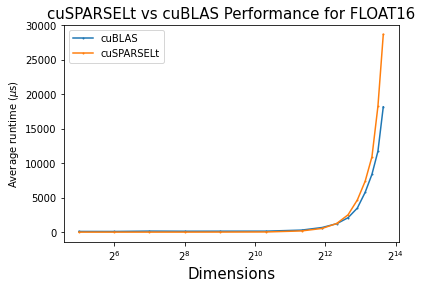

In [27]:
# Plotting tool for a given array of results, each a dictionary with the following structure:
#   {'tags': {}, 'res': []}
import matplotlib.pyplot as plt
import numpy as np

def plot_runtimes(data: dict, label: str, ax):
    dims = [d['tags']['dims'] for d in data]
    runtimes = np.array([d['res'] for d in data]) * 1e6
    avgs = np.array([r.mean() for r in runtimes])
    stds = [r.std() for r in runtimes]

    ax.plot(dims, avgs, marker='o', markersize=1, label=label)
    # ax.errorbar(dims, avgs, yerr=stds, fmt='o', capsize=3, elinewidth=1, markeredgewidth=1)
    ax.set_xscale("log", basex=2)
    ax.set_xlabel('Dimensions', fontsize=15)
    ax.set_ylabel('Average runtime ($\mu$s)', fontsize=10)
    return ax

# fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(18,5))
fig, ax = plt.subplots()
# fig.tight_layout()
# plot_runtimes(all_cublas_perf_res, 'cuBLAS Performance', ax1)
plot_runtimes(all_sparse_cublas_perf_res, 'cuBLAS', ax)
plot_runtimes(all_cult_perf_res, 'cuSPARSELt', ax)
plt.legend()
plt.title('cuSPARSELt vs cuBLAS Performance for ' + all_cult_perf_res[0]['tags']['dtype'].upper(), fontsize=15)
plt.savefig('raw_performance.png', dpi=500)
plt.show()

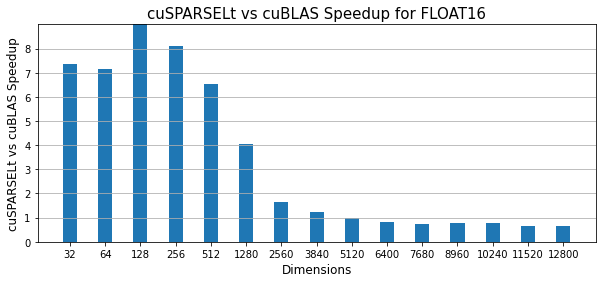

In [24]:
# Plotting tool for a given array of results, each a dictionary with the following structure:
#   {'tags': [], 'res': []}
import matplotlib.pyplot as plt
import numpy as np

def plot_speedup(baseline: dict, ours: dict, title: str):
    dims_baseline = [d['tags']['dims'] for d in baseline]
    dims_ours = [d['tags']['dims'] for d in ours]
    speedup = np.array([d['res'].mean() for d in baseline]) / np.array([d['res'].mean() for d in ours])
    # fig, ax = plt.subplots()
    # ax.errorbar(dims, avgs, yerr=stds, fmt='o', capsize=3, elinewidth=1, markeredgewidth=1)
    # ax.set_xscale("log", basex=2)
    dims_str = [str(d) for d in dims_baseline]
    plt.figure(figsize=(10, 4))
    plt.bar(x=dims_str, height=speedup, width=0.4, align='center', alpha=1)
    plt.xticks(dims_str, dims_str)
    # plt.xscale("log", basex=2)
    plt.title(title, fontsize=15)
    plt.xlabel('Dimensions', fontsize=12)
    plt.ylabel('cuSPARSELt vs cuBLAS Speedup', fontsize=12)
    plt.grid(which='major', axis='y', zorder=-1.0)
    plt.yticks(np.arange(0, 9, 1.0))
    plt.ylim(top=9)
    plt.savefig('comparison.png', dpi=500)
    plt.show()

plot_speedup(all_sparse_cublas_perf_res, all_cult_perf_res, title='cuSPARSELt vs cuBLAS Speedup for ' + all_cult_perf_res[0]['tags']['dtype'].upper())


In [25]:
print([d['tags']['dims'] for d in all_cublas_perf_res])

print(np.array([d['res'].mean() for d in all_cublas_perf_res]) * 1e6)
print(np.array([d['res'].mean() for d in all_cult_perf_res]) * 1e6)
print(np.array([d['res'].mean() for d in all_sparse_cublas_perf_res]) * 1e6)

[32, 64, 128, 256, 512, 1280, 2560, 3840, 5120, 6400, 7680, 8960, 10240, 11520, 12800]
[  112.90623903   110.91967881   144.95743871   148.66431981
   152.67839998   195.31776011   305.99167764   699.12576079
  1171.70176506  2140.91777802  3522.04800606  5772.4723053
  8447.6108551  11823.45220566 18320.50678253]
[1.52985600e+01 1.53190399e+01 1.58105598e+01 1.76947203e+01
 2.29990397e+01 3.81747212e+01 1.86490879e+02 5.47901438e+02
 1.26830592e+03 2.52186623e+03 4.66515965e+03 7.38031619e+03
 1.09131776e+04 1.82285926e+04 2.86268825e+04]
[  112.78335974   109.7318387    162.79551983   143.19615871
   150.09791851   154.70592111   306.05312049   681.86111808
  1233.40800285  2102.70207882  3494.95296001  5774.27455902
  8377.8150177  11717.63198853 18156.33922577]


In [ ]:
all_pytorch_perf_res = []
for dims in dims_l:
    size = dims  # TODO might want options for different size A, B
    sparsity = (2, 4)

    A = torch.rand((size, size)) # TODO need to think carefully about dtypes

    print('\nsparsifying matrix')
    A = make_fss(A).cuda()
    B = torch.rand((size, size)).cuda()

    # https://pytorch.org/docs/stable/benchmark_utils.html
    timer = benchmark.Timer(
        stmt='torch.matmul(A, B)',
        setup='import torch',
        globals={'A': A, 'B': B},
        label='native PyTorch matmul')

    print('\nbenchmarking\n')
    print(timer.timeit(100).)



sparsifying matrix

benchmarking

native PyTorch matmul
setup: import torch
  6.61 ms
  1 measurement, 100 runs , 1 thread

sparsifying matrix

benchmarking

native PyTorch matmul
setup: import torch
  14.26 ms
  1 measurement, 100 runs , 1 thread

sparsifying matrix

benchmarking

native PyTorch matmul
setup: import torch
  28.31 ms
  1 measurement, 100 runs , 1 thread

sparsifying matrix

benchmarking

native PyTorch matmul
setup: import torch
  48.36 ms
  1 measurement, 100 runs , 1 thread

sparsifying matrix

benchmarking

native PyTorch matmul
setup: import torch
  75.98 ms
  1 measurement, 100 runs , 1 thread

sparsifying matrix

benchmarking

native PyTorch matmul
setup: import torch
  113.20 ms
  1 measurement, 100 runs , 1 thread

sparsifying matrix

benchmarking

native PyTorch matmul
setup: import torch
  159.42 ms
  1 measurement, 100 runs , 1 thread

sparsifying matrix

benchmarking

native PyTorch matmul
setup: import torch
  219.50 ms
  1 measurement, 100 runs , 1 threa